In [1]:
from neuron import h, gui
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
plt.rcParams['font.size']=15

In [2]:
!nrnivmodl

/home/mjy/project/Bilinear_Network/sheasbyfohlmeister1999
capump.mod spike.mod
capump.mod spike.mod
 -> Compiling mod_func.c
gcc -O2   -I. -I..   -I/home/mjy/anaconda/envs/pytorch/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 -> NMODL capump.mod
MODLUNIT=/home/mjy/anaconda/envs/pytorch/lib/python3.7/site-packages/neuron/.data/share/nrn/lib/nrnunits.lib \
  /home/mjy/anaconda/envs/pytorch/lib/python3.7/site-packages/neuron/.data/bin/nocmodl capump.mod
 -> NMODL spike.mod
MODLUNIT=/home/mjy/anaconda/envs/pytorch/lib/python3.7/site-packages/neuron/.data/share/nrn/lib/nrnunits.lib \
  /home/mjy/anaconda/envs/pytorch/lib/python3.7/site-packages/neuron/.data/bin/nocmodl spike.mod
Translating capump.mod into capump.c
Translating spike.mod into spike.c
Notice: VERBATIM blocks are not thread safe
Notice: This mechanism cannot be used with CVODE
Thread Safe
 -> Compiling x86_64/spike.c
(cd .. ; gcc -O2   -I. -I..   -I/home/mjy/an

In [3]:
h.load_file('mosinit.hoc')

	1 
	1 
	1 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	1 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	0 
	0 
	0 
	0 
	1 
loading: SmallSimple/CTT1209B/ctt1209b
	1 


1.0

In [4]:
def change_to_pas():
    for sec in h.allsec():
        #if sec != h.soma:
            sec.gnabar_spike = 0
            sec.gkbar_spike = 0
            sec.gcabar_spike = 0
            sec.gabar_spike = 0
            sec.gkcbar_spike = 0
change_to_pas()

In [5]:
for sec in h.allsec():
    if sec != h.soma:
        sec.Ra = 500
        sec.cm = 0.5

In [5]:
for sec in h.allsec():
    sec.gnabar_spike = 0.04

In [6]:
modi_dend = [h.dend1[0], h.dend1[1], h.dend1[4], h.dend2[0], h.dend2[1], h.dend2[4]]
for sec in modi_dend:
    sec.L *= 4

In [7]:
input_list = [h.dend1[2], h.dend1[3], h.dend1[5], h.dend1[6], h.dend2[2], h.dend2[3], h.dend2[6], h.dend2[7], h.dend2[8]]
#input_list = [h.dend1[2], h.dend1[3], h.dend1[1], h.dend1[0], h.dend2[6], h.dend2[7], h.dend2[5], h.dend2[4], h.dend2[0]]

In [11]:
ic = h.IClamp[0]
ic.amp = 0

ns0 = h.NetStim()
ns1 = h.NetStim()
ns2 = h.NetStim()
ns3 = h.NetStim()
ns4 = h.NetStim()
ns5 = h.NetStim()
ns6 = h.NetStim()
ns7 = h.NetStim()
ns8 = h.NetStim()

syn0 = h.Exp2Syn(input_list[0](1))
syn1 = h.Exp2Syn(input_list[1](1))
syn2 = h.Exp2Syn(input_list[2](1))
syn3 = h.Exp2Syn(input_list[3](1))
syn4 = h.Exp2Syn(input_list[4](1))
syn5 = h.Exp2Syn(input_list[5](1))
syn6 = h.Exp2Syn(input_list[6](1))
syn7 = h.Exp2Syn(input_list[7](1))
syn8 = h.Exp2Syn(input_list[8](1))

nc0 = h.NetCon(ns0, syn0)
nc1 = h.NetCon(ns1, syn1)
nc2 = h.NetCon(ns2, syn2)
nc3 = h.NetCon(ns3, syn3)
nc4 = h.NetCon(ns4, syn4)
nc5 = h.NetCon(ns5, syn5)
nc6 = h.NetCon(ns6, syn6)
nc7 = h.NetCon(ns7, syn7)
nc8 = h.NetCon(ns8, syn8)

In [12]:
ns_list = [ns0, ns1, ns2, ns3, ns4, ns5, ns6, ns7, ns8]
syn_list = [syn0, syn1, syn2, syn3, syn4, syn5, syn6, syn7, syn8]
syne_list = [syn0, syn2, syn4, syn6, syn8]
syni_list = [syn1, syn3, syn5, syn7]
nc_list = [nc0, nc1, nc2, nc3, nc4, nc5, nc6, nc7, nc8]
nce_list = [nc0, nc2, nc4, nc6, nc8]
nci_list = [nc1, nc3, nc5, nc7]
branch_points = [h.dend1[1], h.dend1[0], h.dend1[4], h.dend2[1], h.dend2[0], h.dend2[4], h.dend2[5]]

In [120]:
for i in range(len(input_list)):
    ns_list[i].start = 0
    ns_list[i].number = 1
    ns_list[i].interval = 50
    ns_list[i].noise = 0
    nc_list[i].delay = 000
# E
for i in range(len(input_list)):
    syn_list[i].tau1 = 0.1
    syn_list[i].tau2 = 4
    syn_list[i].e = -80
    if i == 0:
        nc_list[i].weight[0] = 0.00001 * 8
    elif i == 1:
        nc_list[i].weight[0] = 0.000
    else:
        nc_list[i].weight[0] = 0.00000

# # EI
# for i in range(len(syne_list)):
#     syne_list[i].tau = 7
#     syne_list[i].e = 0

# for i in range(len(syni_list)):
#     syni_list[i].tau = 7
#     syni_list[i].e = -75

# for i in range(len(input_list)):
#     if i == 1:
#         if i % 2 == 0:
#             nc_list[i].weight[0] = 0.00003
#         else:
#             nc_list[i].weight[0] = 0.0001
#     else:
#         nc_list[i].weight[0] = 0.00000
# for i in range(len(nce_list)):
#     nce_list[i].weight[0] = 0.00003
# for i in range(len(nci_list)):
#     nci_list[i].weight[0] = 0.0001



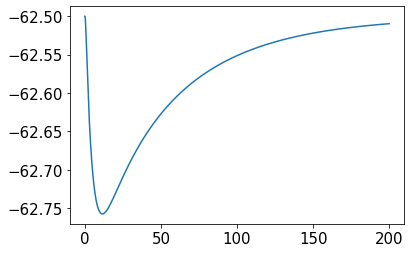

In [121]:
t = h.Vector().record(h._ref_t)
v = h.Vector().record(h.soma(0.5)._ref_v)
vec = h.Vector()
netcon = h.NetCon(h.soma(0.5)._ref_v, None)
netcon.record(vec)
tvec0 = h.Vector()
nc1.record(tvec0)
h.finitialize(-62.5)
h.continuerun(200)
plt.plot(t, v)
#plt.axvline(x=16.2, color='black')

In [111]:
def biexponential(x, tau_rise, tau_decay):
    return (1 - np.exp(-x / tau_rise)) * np.exp(-x / tau_decay)

In [137]:
np.sum(np.square(y*np.std(Y_train)+np.mean(Y_train)-2.31-np.array(v)[::10]))

0.0036711558584413486

In [206]:
v = 0.1 * np.random.randn(30) 

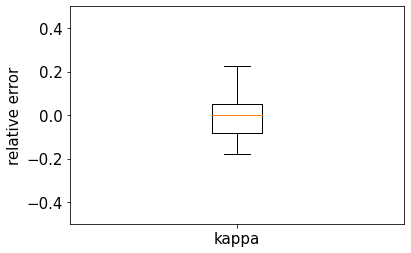

In [208]:
p = ['kappa']
plt.boxplot([v],showfliers=False,labels=p)
# plt.scatter(1, 0.0036, label='GABA')
# plt.scatter(1, 0.004, label='AMPA')
# plt.scatter(1, 0.01, label='NMDA')
plt.ylim(-0.5, 0.5)
plt.ylabel('relative error')
#plt.legend()
plt.savefig('figure/boxplot_kappa_passive_Neuron2018', bbox_inches='tight')

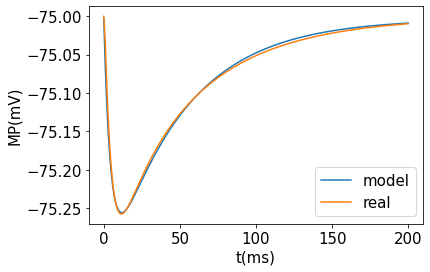

In [136]:
x = np.linspace(0, 200, 201)
y = -0.34 * biexponential(x, 5, 48)
plt.plot(y*np.std(Y_train)+np.mean(Y_train)-2.31-12.5, label='model')
plt.plot(np.array(v)[::10]-12.5, label='real')
plt.xlabel('t(ms)')
plt.ylabel('MP(mV)')
plt.legend()
plt.savefig('figure/kernel_Neuron2018_GABA', bbox_inches='tight')

In [18]:
with open('pars/pars_b+b_passive_EI.p', 'rb') as fo:
    Vars_bb = pickle.load(fo, encoding='bytes')
with open('data/training_set_op_temp_20Hz_passive_EI.p', 'rb') as fo:
    Y_train = pickle.load(fo, encoding='bytes')
Vars_bb

array([ 8.21011965e-01, -2.85379640e-01,  7.12594440e-01,  3.04079919e-02,
        7.13911843e-01, -2.82457327e-01,  7.90389668e-01, -2.41437437e-01,
        8.79241888e-01,  7.02465333e+00,  7.95770791e+00,  7.71963387e+00,
        8.10520450e+00,  8.20191593e+00,  8.02636791e+00,  8.30264615e+00,
        8.04577389e+00,  7.24150179e+00,  4.94641672e+01,  4.98824067e+01,
        4.97116844e+01,  4.99758248e+01,  4.98656219e+01,  4.99033169e+01,
        4.97648362e+01,  4.99138912e+01,  4.94699412e+01, -1.01816083e-01,
        7.23459140e-03, -3.43598402e-02,  1.27008930e+00, -2.30450418e-01,
        1.82023272e+00,  2.39498546e-02, -7.48494177e-02, -2.72451959e-03,
        1.67614702e+00, -8.79102864e-02, -1.15707197e-01,  1.51910329e-02,
       -2.39292328e-01, -5.55564472e-02,  3.24286022e-02, -5.82851438e-02,
        2.64953947e-02,  1.38956953e+00,  1.50145506e-02,  6.46207214e-03,
       -4.31512067e-02, -3.89179163e-01, -9.34978532e-02, -2.67277956e-01,
       -1.80907036e-01, -

In [37]:
idx1 = 0
idx2 = 1
for i in range(len(input_list)):
    if i == idx1:
        nc_list[i].weight[0] = 0.0001 * 64
    else:
        nc_list[i].weight[0] = 0.0000
    # if i == idx1:
    #     if i % 2 == 0:
    #         nc_list[i].weight[0] = 0.00003
    #     else:
    #         nc_list[i].weight[0] = 0.0001
    # else:
    #     nc_list[i].weight[0] = 0.00000
t = h.Vector().record(h._ref_t)
v = h.Vector().record(h.soma(0.5)._ref_v)
h.finitialize(-66.54)
h.continuerun(200)
v1 = np.array(v) + 66.54

for i in range(len(input_list)):
    if i == idx2:
        nc_list[i].weight[0] = 0.0001 * 64
    else:
        nc_list[i].weight[0] = 0.0000
    # if i == idx2:
    #     if i % 2 == 0:
    #         nc_list[i].weight[0] = 0.00003
    #     else:
    #         nc_list[i].weight[0] = 0.0001
    # else:
    #     nc_list[i].weight[0] = 0.00000
t = h.Vector().record(h._ref_t)
v = h.Vector().record(h.soma(0.5)._ref_v)
h.finitialize(-66.54)
h.continuerun(200)
v2 = np.array(v) + 66.54

for i in range(len(input_list)):
    if i == idx2:
        nc_list[i].weight[0] = 0.0001 * 64
    elif i == idx1:
        nc_list[i].weight[0] = 0.0001 * 64
    else:
        nc_list[i].weight[0] = 0.0000
    # if i == idx1:
    #     if i % 2 == 0:
    #         nc_list[i].weight[0] = 0.00003
    #     else:
    #         nc_list[i].weight[0] = 0.0001
    # elif i == idx2:
    #     if i % 2 == 0:
    #         nc_list[i].weight[0] = 0.00003
    #     else:
    #         nc_list[i].weight[0] = 0.0001
    # else:
    #     nc_list[i].weight[0] = 0.00000
t = h.Vector().record(h._ref_t)
v = h.Vector().record(h.soma(0.5)._ref_v)
h.finitialize(-66.54)
h.continuerun(200)
vs = np.array(v) + 66.54

In [38]:
tp = np.argmax(v1)
print(v1[tp], v2[tp], vs[tp])
print((v1[tp] + v2[tp] - vs[tp]) / (v1[tp] * v2[tp]))

14.210127191924144 13.025573540039971 3.8567766750860883
0.12630766303087435


In [133]:
tp = np.argmax(v1)
kappa = np.zeros(5)
kappa[0] = (v1[tp-100] + v2[tp-100] - vs[tp-100]) / (v1[tp-100] * v2[tp-100])
kappa[1] = (v1[tp-50] + v2[tp-50] - vs[tp-50]) / (v1[tp-50] * v2[tp-50])
kappa[2] = (v1[tp] + v2[tp] - vs[tp]) / (v1[tp] * v2[tp])
kappa[3] = (v1[tp+50] + v2[tp+50] - vs[tp+50]) / (v1[tp+50] * v2[tp+50])
kappa[4] = (v1[tp+100] + v2[tp+100] - vs[tp+100]) / (v1[tp+100] * v2[tp+100])

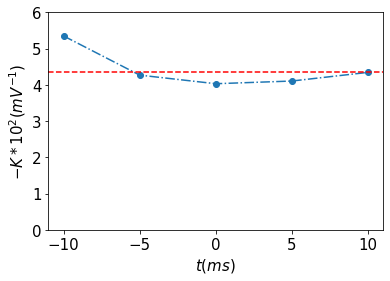

In [138]:
t = [-10, -5, 0, 5, 10]
plt.plot(t, kappa*100, 'o-.')
plt.axhline(y = 4.349, c='r', ls='--')
#plt.axhline(y = 4.349, c='b', ls='--')
plt.ylim(0, 6)
plt.xlabel(r'$t(ms)$')
plt.ylabel(r'$-K*10^2(mV^{-1})$')
plt.savefig('figure/kappa_compare_EE', bbox_inches='tight')

In [44]:
np.mean(kappa)

0.04349450231228494

In [15]:
tp = np.argmax(v1)
kappa = np.zeros(9)
kappa[0] = (v1[tp-150] + v2[tp-150] - vs[tp-150]) / (v1[tp-150] * v2[tp-150])
kappa[1] = (v1[tp-100] + v2[tp-100] - vs[tp-100]) / (v1[tp-100] * v2[tp-100])
kappa[2] = (v1[tp-50] + v2[tp-50] - vs[tp-50]) / (v1[tp-50] * v2[tp-50])
kappa[3] = (v1[tp] + v2[tp] - vs[tp]) / (v1[tp] * v2[tp])
kappa[4] = (v1[tp+50] + v2[tp+50] - vs[tp+50]) / (v1[tp+50] * v2[tp+50])
kappa[5] = (v1[tp+100] + v2[tp+100] - vs[tp+100]) / (v1[tp+100] * v2[tp+100])
kappa[6] = (v1[tp+150] + v2[tp+150] - vs[tp+150]) / (v1[tp+150] * v2[tp+150])
kappa[7] = (v1[tp+200] + v2[tp+200] - vs[tp+200]) / (v1[tp+200] * v2[tp+200])
kappa[8] = (v1[tp+250] + v2[tp+250] - vs[tp+250]) / (v1[tp+250] * v2[tp+250])

Text(0, 0.5, '$K*10^2(mV^{-1})$')

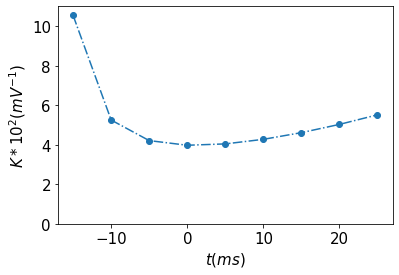

In [16]:
t = [-15, -10, -5, 0, 5, 10, 15, 20, 25]
plt.plot(t, kappa*100, 'o-.')
#plt.axhline(y = 4.34, c='r', ls='--')
plt.ylim(0, 11)
plt.xlabel(r'$t(ms)$')
plt.ylabel(r'$K*10^2(mV^{-1})$')
#plt.savefig('figure/kappa_compare_2', bbox_inches='tight')

In [95]:
with open('pars/pars_b+b_passive_EI.p', 'rb') as fo:
    Vars_bb = pickle.load(fo, encoding='bytes')
with open('pars/pars_b+b_passive_66Hz.p', 'rb') as fo:
    Vars_bb_2 = pickle.load(fo, encoding='bytes')
with open('data/training_set_op_temp_20Hz_passive_EI.p', 'rb') as fo:
        Y_train = pickle.load(fo, encoding='bytes')

In [94]:
Vars_bb, Vars_bb_2

(array([ 8.21011965e-01, -2.85379640e-01,  7.12594440e-01,  3.04079919e-02,
         7.13911843e-01, -2.82457327e-01,  7.90389668e-01, -2.41437437e-01,
         8.79241888e-01,  7.02465333e+00,  7.95770791e+00,  7.71963387e+00,
         8.10520450e+00,  8.20191593e+00,  8.02636791e+00,  8.30264615e+00,
         8.04577389e+00,  7.24150179e+00,  4.94641672e+01,  4.98824067e+01,
         4.97116844e+01,  4.99758248e+01,  4.98656219e+01,  4.99033169e+01,
         4.97648362e+01,  4.99138912e+01,  4.94699412e+01, -1.01816083e-01,
         7.23459140e-03, -3.43598402e-02,  1.27008930e+00, -2.30450418e-01,
         1.82023272e+00,  2.39498546e-02, -7.48494177e-02, -2.72451959e-03,
         1.67614702e+00, -8.79102864e-02, -1.15707197e-01,  1.51910329e-02,
        -2.39292328e-01, -5.55564472e-02,  3.24286022e-02, -5.82851438e-02,
         2.64953947e-02,  1.38956953e+00,  1.50145506e-02,  6.46207214e-03,
        -4.31512067e-02, -3.89179163e-01, -9.34978532e-02, -2.67277956e-01,
        -1.8

In [119]:
def calculate_kappa(idx1, idx2):
    for i in range(len(input_list)):
        if i == idx1:
            nc_list[i].weight[0] = 0.00005
        else:
            nc_list[i].weight[0] = 0.0000
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    h.finitialize(-62.5)
    h.continuerun(200)
    v1 = np.array(v) + 62.5

    for i in range(len(input_list)):
        if i == idx2:
            nc_list[i].weight[0] = 0.00005
        else:
            nc_list[i].weight[0] = 0.0000
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    h.finitialize(-62.5)
    h.continuerun(200)
    v2 = np.array(v) + 62.5

    for i in range(len(input_list)):
        if i == idx2:
            nc_list[i].weight[0] = 0.00005
        elif i == idx1:
            nc_list[i].weight[0] = 0.00005
        else:
            nc_list[i].weight[0] = 0.0000
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    h.finitialize(-62.5)
    h.continuerun(200)
    vs = np.array(v) + 62.5

    tp = np.argmax(v1)
    kappa = np.zeros(5)
    kappa[0] = (v1[tp-100] + v2[tp-100] - vs[tp-100]) / (v1[tp-100] * v2[tp-100])
    kappa[1] = (v1[tp-50] + v2[tp-50] - vs[tp-50]) / (v1[tp-50] * v2[tp-50])
    kappa[2] = (v1[tp] + v2[tp] - vs[tp]) / (v1[tp] * v2[tp])
    kappa[3] = (v1[tp+50] + v2[tp+50] - vs[tp+50]) / (v1[tp+50] * v2[tp+50])
    kappa[4] = (v1[tp+100] + v2[tp+100] - vs[tp+100]) / (v1[tp+100] * v2[tp+100])
        
    return np.mean(kappa)

In [139]:
def calculate_kappa_EI(idx1, idx2):
    for i in range(len(input_list)):

        if i == idx1:
            if i % 2 == 0:
                nc_list[i].weight[0] = 0.00003
            else:
                nc_list[i].weight[0] = 0.0001
        else:
            nc_list[i].weight[0] = 0.00000
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    h.finitialize(-62.5)
    h.continuerun(200)
    v1 = np.array(v) + 62.5

    for i in range(len(input_list)):
        if i == idx2:
            if i % 2 == 0:
                nc_list[i].weight[0] = 0.00003
            else:
                nc_list[i].weight[0] = 0.0001
        else:
            nc_list[i].weight[0] = 0.00000
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    h.finitialize(-62.5)
    h.continuerun(200)
    v2 = np.array(v) + 62.5

    for i in range(len(input_list)):
        if i == idx1:
            if i % 2 == 0:
                nc_list[i].weight[0] = 0.00003
            else:
                nc_list[i].weight[0] = 0.0001
        elif i == idx2:
            if i % 2 == 0:
                nc_list[i].weight[0] = 0.00003
            else:
                nc_list[i].weight[0] = 0.0001
        else:
            nc_list[i].weight[0] = 0.00000
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    h.finitialize(-62.5)
    h.continuerun(200)
    vs = np.array(v) + 62.5
    if idx1 % 2 == 0:
        tp = np.argmax(v1)
    else:
        tp = np.argmin(v1)
    kappa = np.zeros(5)
    kappa[0] = (v1[tp-100] + v2[tp-100] - vs[tp-100]) / (v1[tp-100] * v2[tp-100])
    kappa[1] = (v1[tp-50] + v2[tp-50] - vs[tp-50]) / (v1[tp-50] * v2[tp-50])
    kappa[2] = (v1[tp] + v2[tp] - vs[tp]) / (v1[tp] * v2[tp])
    kappa[3] = (v1[tp+50] + v2[tp+50] - vs[tp+50]) / (v1[tp+50] * v2[tp+50])
    kappa[4] = (v1[tp+100] + v2[tp+100] - vs[tp+100]) / (v1[tp+100] * v2[tp+100])

    return np.mean(kappa)

In [141]:
K = np.ones((9, 9))
for i in range(9):
    if i > 0:
        for j in range(i):
            K[i, j] = calculate_kappa_EI(i, j)
Vars = np.ones((9, 9))
for i in range(9):
    if i > 0:
        for j in range(i):
            Vars[i, j] = Vars_bb[27+int(i*(i-1)/2)+j]

In [142]:
K

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ],
       [-0.15845425,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.04368553, -0.08642394,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ],
       [-0.08249966, -0.17347131, -0.4628141 ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.01507635, -0.03028979,  0.01454407, -0.02859254,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ],
       [-0.03432161, -0.07668289, -0.03265808, -0.06452762, -0.08459394,
         1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.01402382, -0.02997762,  0.01351956, -0.02823123,  0.01977798,
        -0.04517376,  1.        ,  1.        ,  1.        ],
       [-0.03354789, -0.07531197, -0.03189675, -0.06337534, -0

In [146]:
K = K - 1

In [59]:
K = np.ones((9, 9))
Vars = K * (1 + np.random.randn(9, 9)*0.2)

In [127]:
Vars[2, 1] = 0.084
Vars[3, 0] = 0.05
Vars[4, 0] = 0.02
Vars[4, 1] = 0.015
Vars[4, 2] = 0.017
Vars[4, 3] = 0.015
Vars[5, 0] = 0.013
Vars[5, 1] = 0.01
Vars[5, 2] = 0.014
Vars[5, 3] = 0.015
Vars[6, 0] = 0.015
Vars[6, 1] = 0.011
Vars[6, 2] = 0.015
Vars[6, 3] = 0.015
Vars[7, 0] = 0.015
Vars[7, 1] = 0.013
Vars[7, 3] = 0.013
Vars[7, 4] = 0.04
Vars[8, 0] = 0.013
Vars[8, 1] = 0.015
Vars[8, 3] = 0.016
Vars[8, 4] = 0.02
Vars[8, 5] = 0.018 
Vars[8, 6] = 0.025 
Vars[8, 7] = 0.025

Text(0.5, 1.0, 'Relative error between the model kappa and the real kappa')

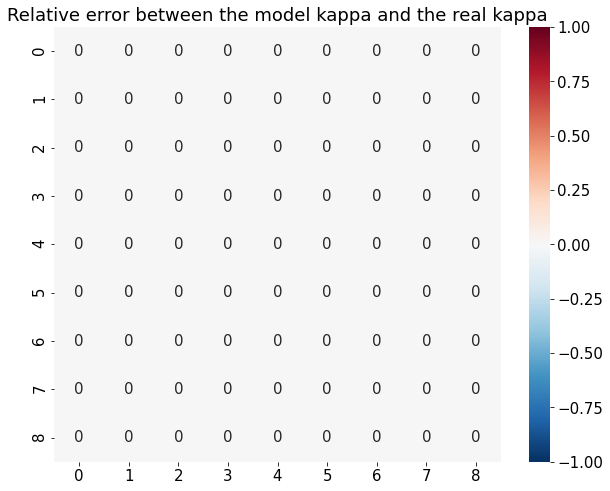

In [60]:
Err = np.zeros((9, 9))
for i in range(9):
    if i > 0:
        for j in range(i):
            if K[i, j] == 1:
                pass
            else:
                Err[i, j] = (Vars[i, j] - K[i, j]) / K[i, j]
#Err = (Vars - K) / K
plt.figure(figsize=(10, 8))
sns.heatmap(Err, cmap='RdBu_r', vmax = 1, vmin = -1, annot=True)
plt.title('Relative error between the model kappa and the real kappa')
#plt.savefig('figure/kappa_compare_hm_EI',bbox_inches='tight')

In [73]:
Vars[4, 0]

0.037154598979104655

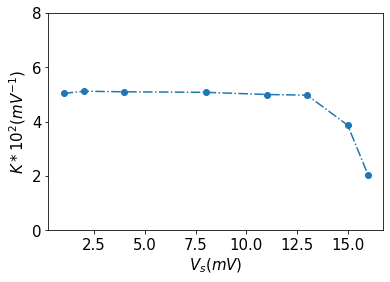

In [52]:
kappa = [5.04, 5.12, 5.10, 5.08, 5.00, 4.976, 3.87, 2.05]
g = [1, 2, 4, 8, 11, 13, 15, 16]
plt.plot(g, kappa, 'o-.')
plt.ylim(0, 8)
plt.xlabel(r'$V_s(mV)$')
plt.ylabel(r'$K*10^2(mV^{-1})$')
plt.savefig('figure/kappa_active', bbox_inches='tight')